# Level 1 | Task 1 | Top Cuisines

* Determine the top three most common cuisines in the dataset.
* Calculate the percentage of restaurants that serve each of the top cuisines.

In [1]:
import pandas as pd
from collections import Counter
df = pd.read_csv('/kaggle/input/restaurants/Dataset .csv')
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [2]:
df['Cuisines'].head()

0          French, Japanese, Desserts
1                            Japanese
2    Seafood, Asian, Filipino, Indian
3                     Japanese, Sushi
4                    Japanese, Korean
Name: Cuisines, dtype: object

In [3]:
df['Cuisines'] = df['Cuisines'].fillna('')  
df['cu_list'] = df['Cuisines'].str.split(', ')
df['cu_list'].head()

0          [French, Japanese, Desserts]
1                            [Japanese]
2    [Seafood, Asian, Filipino, Indian]
3                     [Japanese, Sushi]
4                    [Japanese, Korean]
Name: cu_list, dtype: object

In [4]:
cu_all = df['cu_list'].explode()
cu_counts = Counter(cu_all)
top_3 = cu_counts.most_common(3)
print("Top 3 cuisines:", top_3)

Top 3 cuisines: [('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986)]


In [5]:
total_restaurants = len(df)

for Cu, count in top_3:
    percentage = (count / total_restaurants) * 100
    print(f"{Cu}: {percentage:.2f}% of restaurants")

North Indian: 41.46% of restaurants
Chinese: 28.64% of restaurants
Fast Food: 20.79% of restaurants


# Level 1 | Task 2 | City Analysis

* Identify the city with the highest number of restaurants in the dataset.
* Calculate the average rating for restaurants in each city.
* Determine the city with the highest average rating.

In [6]:
print(f"City with the highest number of restaurants: {df['City'].value_counts().idxmax()}")
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print(city_ratings)
print(f"City with the highest average rating: {city_ratings.idxmax()}")


City with the highest number of restaurants: New Delhi
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64
City with the highest average rating: Inner City


# Level 1 | Task 3 | Price Range Distribution

* Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
* Calculate the percentage of restaurants in each price range category.

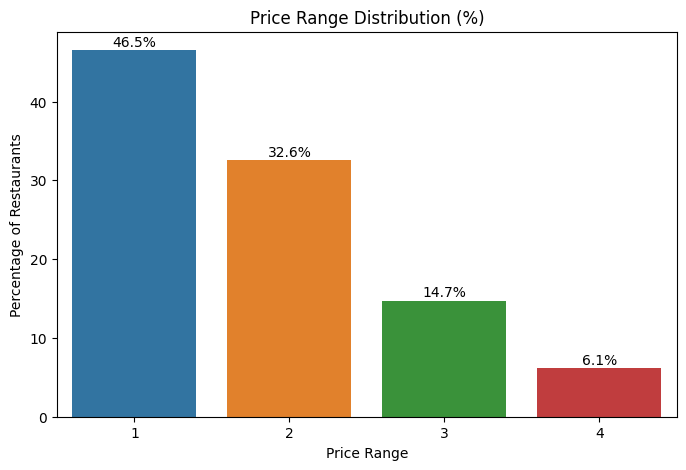

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
percen = df['Price range'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percen.index, y=percen.values)
plt.title('Price Range Distribution (%)')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')

for i, pct in enumerate(percen.values):
    ax.text(i, pct + 0.5, f'{pct:.1f}%', ha='center')

plt.show()

# Level 1 | Task 4 | Price Range Distribution

* Determine the percentage of restaurants that offer online delivery.
* Compare the average ratings of restaurants with and without online delivery.

Percentage of Restaurants Offering Online Delivery:
Has Online delivery
No     74.34%
Yes    25.66%
Name: count, dtype: object

Average Ratings Based on Online Delivery Availability:
Has Online delivery
No     2.47
Yes    3.25
Name: Aggregate rating, dtype: float64


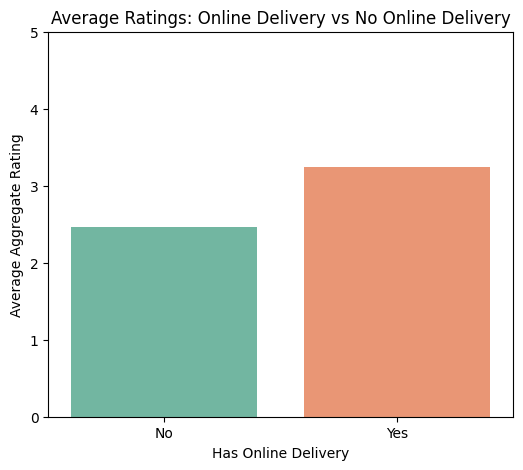

In [8]:
# Price Range Distribution (Compare ratings of restaurants with and without online delivery)
online_delivery_counts = df['Has Online delivery'].value_counts()
online_delivery_percent = (online_delivery_counts / len(df)) * 100

print("Percentage of Restaurants Offering Online Delivery:")
print(online_delivery_percent.round(2).astype(str) + '%')
avg_rating_comparison = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("\nAverage Ratings Based on Online Delivery Availability:")
print(avg_rating_comparison.round(2))

plt.figure(figsize=(6,5))
sns.barplot(
    x=avg_rating_comparison.index, 
    y=avg_rating_comparison.values, 
    palette="Set2"
)
plt.title("Average Ratings: Online Delivery vs No Online Delivery")
plt.xlabel("Has Online Delivery")
plt.ylabel("Average Aggregate Rating")
plt.ylim(0, 5)  # Ratings range from 0 to 5
plt.show()

# Level 2 | Task 1 | Restaurant Ratings

* Analyze the distribution of aggregate ratings and determine the most common rating range.
* Calculate the average number of votes received by restaurants.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


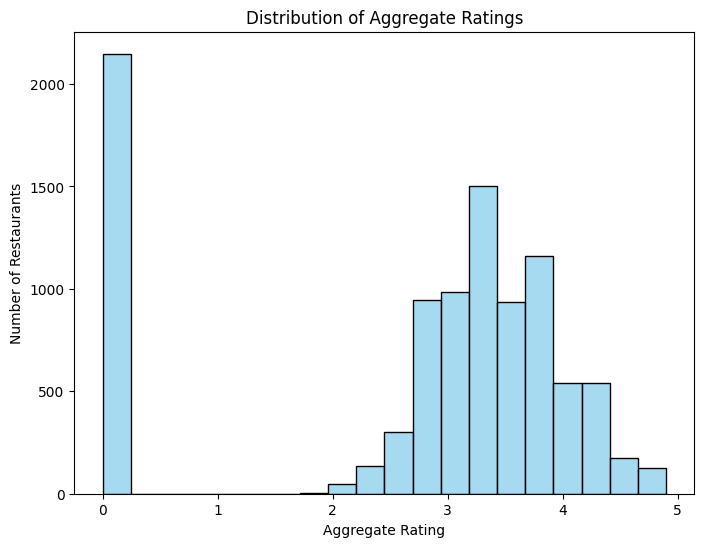

Most Common Rating Range: (3, 4]
Average Number of Votes: 156.91


In [9]:

plt.figure(figsize=(8,6))
sns.histplot(df['Aggregate rating'], bins=20, kde=False, color="skyblue", edgecolor="black")
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.show()

# Determine the most common rating range
rating_bins = pd.cut(df['Aggregate rating'], bins=[0,1,2,3,4,5])
most_common_bin = rating_bins.value_counts().idxmax()

print(f"Most Common Rating Range: {most_common_bin}")


average_votes = df['Votes'].mean()
print(f"Average Number of Votes: {average_votes:.2f}")

# Level 2 | Task 2 | Cuisine Combination

* Identify the most common combinations of cuisines in the dataset.
* Determine if certain cuisine combinations tend to have higher ratings.

In [10]:
import itertools

df['Cuisine List'] = df['Cuisines'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])

combinations = []
for cuisines in df['Cuisine List']:
    if len(cuisines) > 1:
        combinations.extend(list(itertools.combinations(sorted(cuisines), 2)))

combo_counts = Counter(combinations).most_common(10)
combo_df = pd.DataFrame(combo_counts, columns=['Cuisine Combination', 'Count'])

print("Top 10 Most Common Cuisine Combinations:")
print(combo_df)

df['Cuisine Combination'] = df['Cuisine List'].apply(lambda x: ', '.join(sorted(x)) if len(x) > 1 else None)

avg_ratings_by_combo = (
    df.groupby('Cuisine Combination')['Aggregate rating']
    .mean()
    .dropna()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Cuisine Combinations by Average Rating:")
print(avg_ratings_by_combo.round(2))

Top 10 Most Common Cuisine Combinations:
            Cuisine Combination  Count
0       (Chinese, North Indian)   1784
1       (Mughlai, North Indian)    832
2     (Fast Food, North Indian)    485
3   (Continental, North Indian)    468
4          (Chinese, Fast Food)    466
5  (North Indian, South Indian)    405
6            (Chinese, Mughlai)    379
7       (Chinese, South Indian)    346
8        (Chinese, Continental)    303
9       (Italian, North Indian)    295

Top 10 Cuisine Combinations by Average Rating:
Cuisine Combination
Contemporary, European             4.9
American, Sandwich, Tea            4.9
Indonesian, Sunda                  4.9
Bakery, Continental, Italian       4.9
American, Coffee and Tea           4.9
American, Caribbean, Seafood       4.9
Asian, European, Indian            4.9
Bar Food, Burger, Steak            4.9
BBQ, Breakfast, Southern           4.9
American, Healthy Food, Mexican    4.9
Name: Aggregate rating, dtype: float64


# Level 2 | Task 3 | Geographic Analysis

* Plot the locations of restaurants on a map using longitude and latitude coordinates.
* Identify any patterns or clusters of restaurants in specific areas.

In [11]:
import folium
from folium.plugins import MarkerCluster

center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
restaurant_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

marker_cluster = MarkerCluster().add_to(restaurant_map)

for idx, row in df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Restaurant Name']}<br>Rating: {row['Aggregate rating']}<br>Cuisines: {row['Cuisines']}",
        ).add_to(marker_cluster)

restaurant_map.save("restaurant_locations.html")

print("Map created and saved as 'restaurant_locations.html'. Open it in a browser to view.")

Map created and saved as 'restaurant_locations.html'. Open it in a browser to view.


# Level 2 | Task 4 | Restaurant Chains

* Identify if there are any restaurant chains present in the dataset.
* Analyze the ratings and popularity of different restaurant chains.

In [12]:

chain_counts = df['Restaurant Name'].value_counts()

restaurant_chains = chain_counts[chain_counts > 1]
print("Restaurant Chains Found:")
print(restaurant_chains)

chain_analysis = (
    df[df['Restaurant Name'].isin(restaurant_chains.index)]
    .groupby('Restaurant Name')
    .agg(
        Avg_Rating=('Aggregate rating', 'mean'),
        Total_Votes=('Votes', 'sum'),
        Branch_Count=('Restaurant Name', 'count')
    )
    .sort_values(by='Branch_Count', ascending=False)
)

print("\nRestaurant Chain Analysis (Top 10 by Branch Count):")
print(chain_analysis.head(10).round(2))

Restaurant Chains Found:
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64

Restaurant Chain Analysis (Top 10 by Branch Count):
                  Avg_Rating  Total_Votes  Branch_Count
Restaurant Name                                        
Cafe Coffee Day         2.42         2428            83
Domino's Pizza          2.74         6643            79
Subway                  2.91         6124            63
Green Chick Chop        2.67          964            51
McDonald's              3.34         5291            48
Keventers               2.87         1263            34
Pizza Hut               3.32         4961            30
Giani                   2.69          854            29
Baskin Robbins          1.86    

# Level 3 | Task 1 | Restaurant Reviews

* Analyze the text reviews to identify the most common positive and negative keywords.
* Calculate the average length of reviews and explore if there is a relationship between review length and rating.

Most Common Positive Keywords: [('good', 3179), ('excellent', 301)]
Most Common Negative Keywords: [('poor', 186)]

Average Review Length: 1.34 words


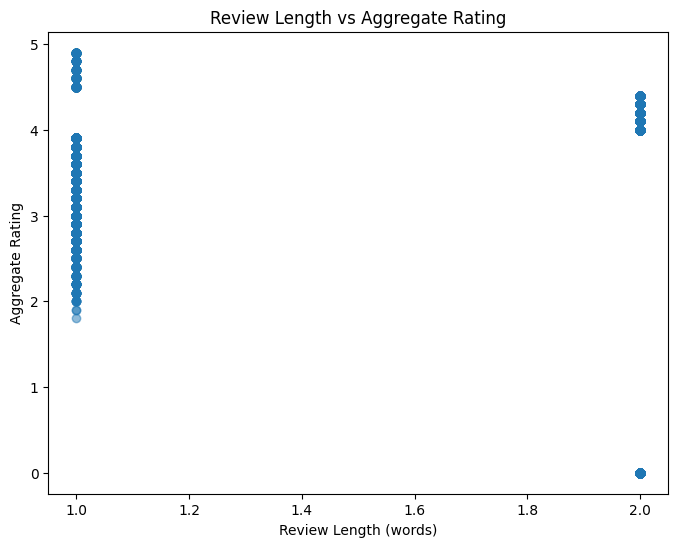

In [13]:
from collections import Counter
import re

review_col = "Rating text"

if review_col in df.columns:
    # --- 1. Clean and tokenize reviews ---
    df[review_col] = df[review_col].astype(str).str.lower()
    df['Tokens'] = df[review_col].apply(lambda x: re.findall(r'\b\w+\b', x))

    # Positive & negative keyword lists (basic example)
    positive_words = {"good", "great", "excellent", "amazing", "delicious", "tasty", "friendly", "best"}
    negative_words = {"bad", "poor", "terrible", "awful", "slow", "rude", "worst", "bland"}

    # Count positive & negative keywords
    pos_counts = Counter()
    neg_counts = Counter()

    for tokens in df['Tokens']:
        for word in tokens:
            if word in positive_words:
                pos_counts[word] += 1
            elif word in negative_words:
                neg_counts[word] += 1

    print("Most Common Positive Keywords:", pos_counts.most_common(10))
    print("Most Common Negative Keywords:", neg_counts.most_common(10))

    df['Review Length'] = df['Tokens'].apply(len)
    avg_length = df['Review Length'].mean()
    print(f"\nAverage Review Length: {avg_length:.2f} words")

    plt.figure(figsize=(8,6))
    plt.scatter(df['Review Length'], df['Aggregate rating'], alpha=0.5)
    plt.title("Review Length vs Aggregate Rating")
    plt.xlabel("Review Length (words)")
    plt.ylabel("Aggregate Rating")
    plt.show()


# Level 3 | Task 2 | Votes Analysis

* Identify the restaurants with the highest and lowest number of votes.
* Analyze if there is a correlation between the number of votes and the rating of arestaurant.

Restaurant with Highest Votes:
Restaurant Name          Toit
City                Bangalore
Votes                   10934
Aggregate rating          4.8
Name: 728, dtype: object

Restaurant with Lowest Votes:
Restaurant Name     Cantinho da Gula
City                      S��o Paulo
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object

Correlation between Votes and Aggregate Rating: 0.31


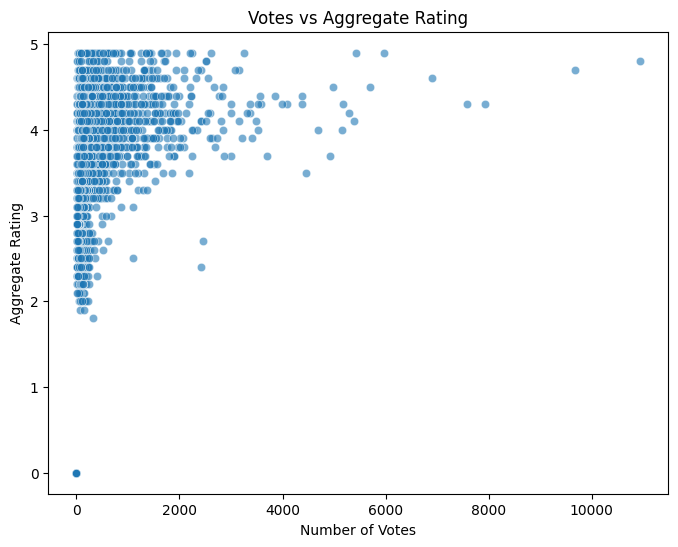

In [14]:
highest_votes = df.loc[df['Votes'].idxmax()]
lowest_votes = df.loc[df['Votes'].idxmin()]

print("Restaurant with Highest Votes:")
print(highest_votes[['Restaurant Name', 'City', 'Votes', 'Aggregate rating']])
print("\nRestaurant with Lowest Votes:")
print(lowest_votes[['Restaurant Name', 'City', 'Votes', 'Aggregate rating']])

correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\nCorrelation between Votes and Aggregate Rating: {correlation:.2f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.6)
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.show()

# Level 3 | Task 3 | Price Range vs. Online Delivery and Table Booking

* Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
* Determine if higher-priced restaurants are more likely to offer these services.

Service Availability by Price Range (%):
   Price range  Online_Delivery_Rate  Table_Booking_Rate  Count
0            1                 15.77                0.02   4444
1            2                 41.31                7.68   3113
2            3                 29.19               45.74   1408
3            4                  9.04               46.76    586


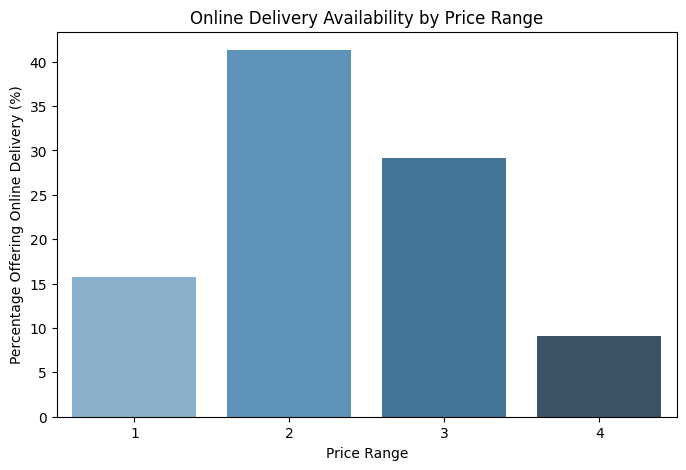

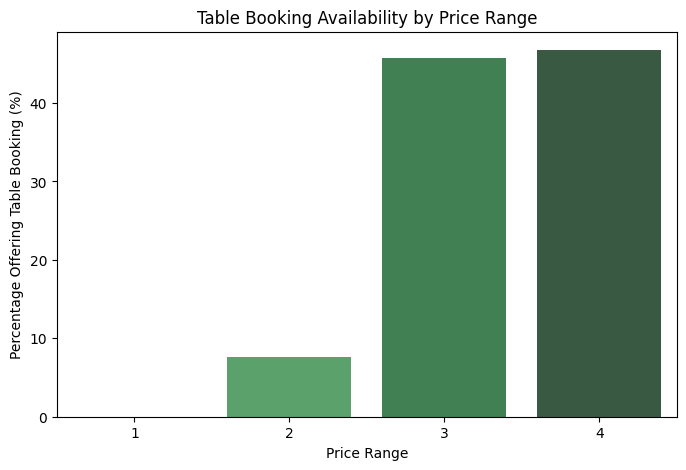

In [15]:

service_analysis = df.groupby('Price range').agg(
    Online_Delivery_Rate=('Has Online delivery', lambda x: (x == 'Yes').mean() * 100),
    Table_Booking_Rate=('Has Table booking', lambda x: (x == 'Yes').mean() * 100),
    Count=('Restaurant ID', 'count')
).reset_index()

print("Service Availability by Price Range (%):")
print(service_analysis.round(2))

plt.figure(figsize=(8,5))
sns.barplot(data=service_analysis, x='Price range', y='Online_Delivery_Rate', palette='Blues_d')
plt.title("Online Delivery Availability by Price Range")
plt.ylabel("Percentage Offering Online Delivery (%)")
plt.xlabel("Price Range")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=service_analysis, x='Price range', y='Table_Booking_Rate', palette='Greens_d')
plt.title("Table Booking Availability by Price Range")
plt.ylabel("Percentage Offering Table Booking (%)")
plt.xlabel("Price Range")
plt.show()